In [1]:
# loading libraries for data manipulation
import numpy as np
import pandas as pd

# loading libraries for data visualization
import matplotlib.pyplot as plt
from plotnine import *

# import tensorflow and keras packages
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

Let's create a neural network to classify digits from images. The MNIST digits dataset contains 70K images of digits (0-9). This is not an image-classification neural network!

In [2]:
# Load MNIST data from keras.datasets
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

(28, 28)


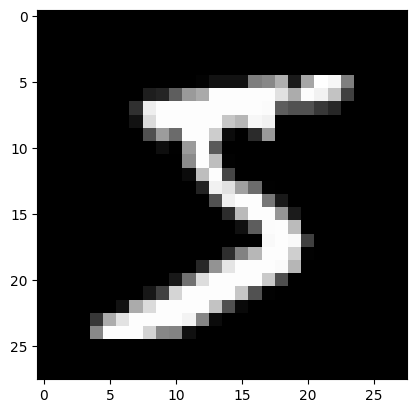

In [3]:
print(X_train_mnist[0].shape)
plt.imshow(X_train_mnist[0], cmap='gray')
plt.show()

While each observation is a 28x28 pixel image, it can be converted into a long 1 dimensional vector of greyscale values. 

In [4]:
# Preprocess: flatten images and normalize pixel values
# reshape(-1,28x28) flattens each image into a 1-dimensional vector of length 28*28
# the -1 here means all items in the object (no need to specify exact amount)
# /255.0 scales a greyscale value between [0-255] into [0-1]  
X_train_mnist = X_train_mnist.reshape(-1, 28*28).astype('float32') / 255.0

print(X_train_mnist[0].shape)

(784,)


Let's build a deep neural network with 1 hidden layer and a new activation function for the output. The softmax function is used for multi-class classification problems. The output layer has the same number of units as the classes, in this instance 10.

In [5]:
# define function to construct architecture
def create_model():
    # fully connected NNet with 1 hidden layer of 128 nodes
    model = keras.Sequential([
        keras.layers.Dense(128,activation='relu',input_shape=(784,)),
        keras.layers.Dense(10,activation='softmax') # output layer
    ])

    return model

We can now define our optimizer. We also need to define a learning rate and initialize our model.

In [ ]:
lr = 0.05

optimizer_name = 'SGD'
optimizer_function = tf.keras.optimizers.SGD(lr)

mnist_sgd_02 = ...

Now, we will compile and train our model for 5 epochs. The loss function here is sparse_categorical_crossentropy. This is a variation of categorical_crossentropy when the class is a numerical value instead of a one-hot encoded vector. 

In [ ]:


mnist_sgd_02.compile(...)

mnist_sgd_02.fit(...)

### Building blocks of a neural network in Tensorflow/Keras


Let's view the architecture of our model

In [ ]:
mnist_sgd_02.summary()

To predict, we load up an image and run it through the model, getting a probability across all classes as a result. 

In [ ]:
plt.imshow(X_test_mnist[10], cmap='gray')
plt.show()

In [ ]:
input_image = X_test_mnist[10].reshape(1, 28*28)/255.0

predictions = mnist_sgd_02.predict(input_image)

for i in range(10):
    print(f"Probability of digit {i}: {predictions[0][i]:.4f}") 

Try different variations of number of hidden layers (and units), epochs, optimizers, and batch sizes. 

- SGD: tf.keras.optimizers.SGD(learning_rate=lr)
- Momentum: tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
- AdaGrad: tf.keras.optimizers.Adagrad(learning_rate=lr)
- RMSProp: tf.keras.optimizers.RMSprop(learning_rate=lr)
- Adam: tf.keras.optimizers.Adam(learning_rate=lr)

In [9]:
# copy the code we have written and add variations to it

Separately, let's apply all optimizers to the dataset to see differences in training. 

In [ ]:
# setting up some variables
model_history = {}
lr = 0.02

# reshaping testing data
X_test_mnist = X_test_mnist.reshape(-1, 28*28).astype('float32') / 255.0

In [ ]:
# dictionary of optimizers
optimizers = {'SGD':tf.keras.optimizers.SGD(lr),
              'Momentum':tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9),
              'AdaGrad':tf.keras.optimizers.Adagrad(learning_rate=lr),
              'RMSProp':tf.keras.optimizers.RMSprop(learning_rate=lr),
              'Adam':tf.keras.optimizers.Adam(learning_rate=lr)}

# for each optimizer, train a different model
for name,func in optimizers.items():
    print(f"\nTraining with {name}")
    model = create_model()
    model.compile(...)
    history = model.fit(...)
    model_history[name] = history.history

history retains all recorded information from a model's training include loss and validation accuracies. Let's plot them to compare each optimizer's impact on the model. 

In [ ]:
# Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['loss'], label=f'{name}')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_accuracy'], label=f'{name}')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()